In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error # evaluation

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Sales.csv')

In [3]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.shape

(200, 5)

In [5]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [8]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
df.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [10]:
df.drop('Unnamed: 0', axis = 1, inplace= True)

In [11]:
x=df.drop('Sales', axis = 1)
y=df['Sales']

In [12]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [13]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=5) 

In [15]:
x_train

,TV,Radio,Newspaper
159,131.7,18.4,34.6
62,239.3,15.5,27.3
166,17.9,37.6,21.6
45,175.1,22.5,31.5
23,228.3,16.9,26.2
...,...,...,...
73,129.4,5.7,31.3
144,96.2,14.8,38.9
118,125.7,36.9,79.2
189,18.7,12.1,23.4


In [16]:
model = LinearRegression()
model

LinearRegression()

In [17]:
model.fit(x_train,y_train)

LinearRegression()

In [18]:
y_pred_test = model.predict(x_test) 
y_pred_test

array([ 6.72296139, 13.75631244, 12.04517877,  9.69967488, 15.5690964 ,
       10.05604087, 13.84462636, 11.57199727, 19.50132767, 10.63532913,
       18.86878088,  7.66094904, 14.95238223, 16.44076381, 21.16915592,
       20.34689481, 17.4717922 , 20.44501887,  6.6345129 , 11.59504468,
       10.73339912, 14.9550131 , 20.47462735, 14.4053483 , 19.82336217,
       21.23329569, 13.95616746, 23.25585899,  8.33169334, 20.72918361,
       15.86252542, 15.18601062, 21.74577286, 18.34562985, 12.80653699,
        9.38349318,  5.37438571, 12.02365628, 19.26275296,  8.12044348])

In [19]:
y_test

119     6.6
77     14.2
148    10.9
149    10.1
154    15.6
151    11.6
122    11.6
6      11.8
28     18.9
71     12.4
188    15.9
34      9.5
21     12.5
40     16.6
55     23.7
104    20.7
3      18.5
39     21.5
117     9.4
134    10.8
180    10.5
26     15.0
54     20.2
165    11.9
53     21.2
93     22.2
174    11.5
17     24.4
56      5.5
84     21.7
25     12.0
156    15.3
42     20.7
141    19.2
50     11.4
51     10.7
195     7.6
116    12.2
142    20.1
24      9.7
Name: Sales, dtype: float64

In [20]:
MSE = mean_squared_error(y_test,y_pred_test)
print('Mean squared is :', MSE)

Mean squared is : 2.550964615953108


In [21]:
MSE = mean_squared_error(y_pred_test,y_test)
print('Mean squared is :', MSE)

Mean squared is : 2.550964615953108


In [22]:
rmse = np.sqrt(MSE)
print('Root mean squared error :', rmse)

Root mean squared error : 1.5971739466799189


In [23]:
mean_absolute_error(y_pred_test,y_test)

1.2673937159929247

In [24]:
r2score = r2_score(y_pred_test,y_test)
r2score

0.8927421354788027

In [25]:
r2score = r2_score(y_test,y_pred_test)
r2score

0.8984204533332627

<Axes: >

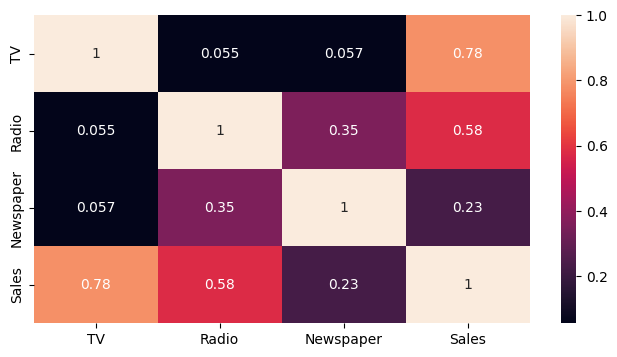

In [26]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),annot=True)